![alt text](https://assets.avatrademarketing.com/wp-content/images/blog/gdp.jpg "GDP")

# Analyzing US economic data 
## GDP and unemployment

### Description  
Short exercise of extracting yearly economic data relating to GDP and unemployment in the US. The objective is to see how the GDP impacts the unemployment rate and grafically present the results in the form of a dashboard.

<a href="https://en.wikipedia.org/wiki/Gross_domestic_product"> Gross domestic product (GDP)</a> is a measure of the market value of all the final goods and services produced in a period. GDP is an indicator of how well the economy is doing. A drop in GDP indicates the economy is producing less; similarly an increase in GDP suggests the economy is performing better.

## Table of Contents
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="#Section_1"> Define a Function that Makes a Dashboard </a></li>
    <li><a href="#Section_2">Create a dataframe that contains the GDP data and display the first five rows of the dataframe</a> </li>
    <li><a href="#Section_3">Create a dataframe that contains the unemployment data and display the first five rows of the dataframe</a> </li>
    <li><a href="#Section_4">Univariate analysis. Display a dataframe where unemployment was greater than 8.5% and lower than 3.5%</a></li>
    <li><a href="#Section_5">Univariate analysis. Display a dataframe where GDP change was greater than 6 and lower than 3</a></li>
    <li><a href="#Section_6">Dashboard</a></li>
    </ul>
<p>
    
</div>

<hr>

### <a name="Section_1"></a> Define function for making the dashboard

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_file, show,output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

In [8]:
def make_dashboard(x, gdp_change, unemployment, title, file_name):
    output_file(file_name)
    p = figure(title=title, x_axis_label='year', y_axis_label='%')
    p.line(x.squeeze(), gdp_change.squeeze(), color="firebrick", line_width=4, legend_label="% GDP change")
    p.line(x.squeeze(), unemployment.squeeze(), line_width=4, legend_label="% unemployed")
    show(p)

In [9]:
#The following link contains the datasets to be used
links={'GDP':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_gdp.csv',\
       'unemployment':'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/PY0101EN/projects/coursera_project/clean_unemployment.csv'}

### <a name="Section_2"></a>Create a dataframe that contains the GDP data and display the first five rows of the dataframe.

The following dataframe contains information for the yearly GDP in the US, where *change-current* indicates the GDP change for the year.

In [54]:
GDP_df = pd.read_csv(links["GDP"])
GDP_df.head()

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
1,1949,272.8,2008.9,10.0,8.7
2,1950,300.2,2184.0,15.7,8.0
3,1951,347.3,2360.0,5.9,4.1
4,1952,367.7,2456.1,6.0,4.7


### <a name="Section_3"></a> Create a dataframe that contains the unemployment data and display the first five rows of the dataframe.

The following dataframe contains information for the yearly unemployment percentages (%) in the US. A new column for unemployment rate change is created.

In [90]:
unemployment_df = pd.read_csv(links["unemployment"])
change = unemployment_df["unemployment"].pct_change()
unemployment_df["% change"]= change
unemployment_df.head()

,date,unemployment,% change
0,1948,3.750000,NaN
1,1949,6.050000,0.613333
2,1950,5.208333,-0.139118
3,1951,3.283333,-0.369600
4,1952,3.025000,-0.078680


### <a name="Section_4"></a>Univariate analysis. Display a dataframe where unemployment was greater than 8.5% and lower than 3.5%

Univariate analysis for *unemployment* data as well as showing the years where *unemployment* was both the highest and lowest is of interest in order to possibly observe trends in the data and relate it to GDP before graphing.

In [12]:
maxUnemployment = unemployment_df["unemployment"].max()
print("The maximum unemployment % for the period is: ", round(maxUnemployment,2))

minUnemployment = unemployment_df["unemployment"].min()
print("The minimum unemployment % for the period is: ", round(minUnemployment,2))

meanUnemployment = unemployment_df["unemployment"].min()
print("The mean unemployment % for the period is: ", round(meanUnemployment,2))

medianUnemployment = unemployment_df["unemployment"].min()
print("The median unemployment % for the period is: ", round(medianUnemployment,2))

The maximum unemployment % for the period is:  9.71
The minimum unemployment % for the period is:  2.93
The mean unemployment % for the period is:  2.93
The median unemployment % for the period is:  2.93


In [69]:
unemployment_df[unemployment_df["unemployment"]>8.5]

,date,unemployment,% change
34,1982,9.708333,0.274617
35,1983,9.600000,-0.011159
61,2009,9.283333,0.600575
62,2010,9.608333,0.035009
63,2011,8.933333,-0.070252


In [96]:
unemployment_df[unemployment_df["unemployment"]<3.5]

,date,unemployment,% change
3,1951,3.283333,-0.369600
4,1952,3.025000,-0.078680
5,1953,2.925000,-0.033058
21,1969,3.491667,-0.018735


### <a name="Section_5"></a>Univariate analysis. Display a dataframe where GDP change was greater than 6 and lower than 3

Univariate analysis for *GDP change* data as well as showing the years where *GDP change* was both the highest and lowest is of interest in order to possibly observe trends in the data and relate it to unemployment before graphing.

In [15]:
maxGDP_change = GDP_df["change-current"].max()
print("The maximum GDP change for the period is: ", round(maxGDP_change,2))

minGDP_change = GDP_df["change-current"].min()
print("The minimum GDP change for the period is: ", round(minGDP_change,2))

meanGDP_change = GDP_df["change-current"].mean()
print("The mean of GDP change for the period is: ", round(meanGDP_change,2))

medianGDP_change = GDP_df["change-current"].median()
print("The median of GDP change for the period is: ", round(medianGDP_change,2))

The maximum GDP change for the period is:  15.7
The minimum GDP change for the period is:  -1.8
The mean of GDP change for the period is:  6.42
The median of GDP change for the period is:  6.0


In [16]:
GDP_df[GDP_df["change-current"]>11]

,date,level-current,level-chained,change-current,change-chained
2,1950,300.2,2184.0,15.7,8.0
24,1972,1282.4,5134.3,11.4,5.6
27,1975,1688.9,5385.4,11.2,5.4
28,1976,1877.6,5675.4,11.1,4.6
29,1977,2086.0,5937.0,13.0,5.5
30,1978,2356.6,6267.2,11.7,3.2
32,1980,2862.5,6450.4,12.2,2.5
35,1983,3638.1,6792.0,11.1,7.2


In [95]:
GDP_df[GDP_df["change-current"]<3]

,date,level-current,level-chained,change-current,change-chained
0,1948,274.8,2020.0,-0.7,-0.6
5,1953,389.7,2571.4,0.3,-0.6
9,1957,474.9,2856.3,1.5,-0.7
59,2007,14477.6,14873.7,1.8,-0.1
60,2008,14718.6,14830.4,-1.8,-2.5
67,2015,18120.7,16471.5,2.7,1.6


### <a name="Section_6"></a>Dashboard

In [18]:
make_dashboard(x=GDP_df[["date"]], gdp_change=GDP_df[["change-current"]], unemployment=unemployment_df[["unemployment"]], title="GDP and unemployment", file_name="index.html")

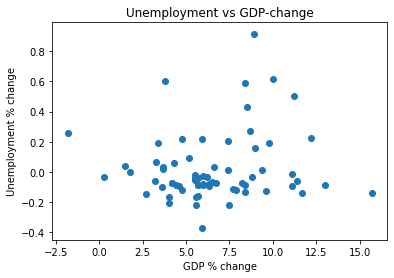

In [97]:
plt.scatter(GDP_df["change-current"],unemployment_df["% change"])
plt.title("Unemployment vs GDP-change")
plt.xlabel("GDP % change")
plt.ylabel("Unemployment % change")
plt.show()

In [86]:
correlation = GDP_df["change-current"].corr(unemployment_df["% change"])
if correlation <0.7:
    print("The correlation (pearson's correlation) between GDP change and unemployment rate is: ", round(correlation,3), ",Weak")
else:
    print("The correlation (pearson's correlation) between GDP change and unemployment rate is: ", round(correlation,3), "-Strong")

The correlation (pearson's correlation) between GDP change and unemployment rate is:  0.116 ,Weak
